In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import math
import matplotlib.patches as Patch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [72]:
data=pd.read_csv("LUBS5990M_courseworkData_202425.csv")

In [73]:
num_rows = len(data)
print(f"Number of rows: {num_rows}")

Number of rows: 6146


In [74]:
data.head()

country   ico_start     ico_end price_usd success distributed_in_ico  \
0       India  10/08/2020  31/12/2020      0.01       Y                0.5   
1      Cyprus  01/08/2020  31/12/2020       0.1       N                0.6   
2          UK  01/03/2019  31/12/2020      0.14       Y                0.5   
3          UK  25/06/2020  31/01/2021       0.1       N                0.5   
4  Seychelles         NaN         NaN      0.06       N                0.4   

  sold_tokens  token_for_sale whitelist  kyc  ...  pre_ico_end  \
0    1.00E+08     500000000.0       Yes  1.0  ...          NaN   
1         NaN      84000000.0        No  1.0  ...   31/10/2019   
2         NaN      75000000.0        No  0.0  ...   15/01/2019   
3         NaN     500000000.0       Yes  1.0  ...          NaN   
4         NaN     400000000.0       Yes  1.0  ...          NaN   

  pre_ico_price_usd                                          accepting  \
0          5.00E-03                        BTC, ETH, and Fiat currency   
1               NaN                                           ETH, BTC   
2               NaN                                      ETH, BTC, LTC   
3               0.1  BTC, ETH, XRP, BNB, LTC, XLM, USDT, BCH, TRX, EOS   
4              0.03                                                ETH   

                                    link_white_paper  \
0                                                NaN   
1               https://www.tycoon.io/whitepaper.pdf   
2            https://mindsync.ai/docs/whitepaper.pdf   
3  https://cdn.pointpay.io/WhitePaper__en.pdf?cac...   
4  https://lohncontrol.com/down/LOHN-white-paper-...   

                                       linkedin_link  \
0  https://www.linkedin.com/company/bitfinex-limi...   
1   https://www.linkedin.com/company/tycoonio/about/   
2         https://www.linkedin.com/company/mindsync/   
3   https://www.linkedin.com/company/pointpay/about/   
4      https://www.linkedin.com/showcase/lohncontrol   

                                      github_link  \
0                                             NaN   
1  https://www.github.com/tycoon?tab=repositories   
2                                             NaN   
3                                             NaN   
4   https://www.github.com/lohn7?tab=repositories   

                                       website rating teamsize ERC20  
0                                          NaN    4.0      NaN   1.0  
1    https://www.tycoon.io?utm_source=icobench    4.8     14.0   1.0  
2                                          NaN    4.5     14.0   1.0  
3                                          NaN    4.7     43.0   1.0  
4  https://lohncontrol.com?utm_source=icobench    4.4     16.0   1.0  

[5 rows x 25 columns]

In [75]:
data.dtypes

country                object
ico_start              object
ico_end                object
price_usd              object
success                object
distributed_in_ico     object
sold_tokens            object
token_for_sale        float64
whitelist              object
kyc                   float64
bonus                 float64
restricted_areas       object
min_investment         object
mvp                    object
pre_ico_start          object
pre_ico_end            object
pre_ico_price_usd      object
accepting              object
link_white_paper       object
linkedin_link          object
github_link            object
website                object
rating                float64
teamsize              float64
ERC20                 float64
dtype: object

In [76]:
import re

def extract_currency(value):
    if isinstance(value, str):
        match = re.search(r"\b([A-Z]{2,5})\b", value)
        if match:
            return match.group(1)
    return "USD" if pd.to_numeric(value, errors="coerce") is not None else np.nan

# Create a new column to store detected currency
data["price_currency"] = data["price_usd"].apply(extract_currency)

# View unique currencies found
unique_currencies = data["price_currency"].dropna().unique()
print("Currencies detected:", unique_currencies)


Currencies detected: ['USD' 'KBX' 'TPLAY' 'DGO' 'HIX' 'ETH' 'RLZ' 'BILL' 'TRE' 'BATT' 'CCR'
 'EUR' 'TRU' 'ICX' 'AXT' 'JPT' 'SYM' 'MARA' 'BHM' 'MDR' 'SQUID' 'RENC'
 'BLOCK' 'BOOK' 'TMED' 'TBE' 'URP' 'NAME' 'ABT' 'ARIA' 'GRD' 'MONI' 'TTR'
 'XSR' 'AMEC' 'ATLS' 'BSSX' 'BTC' 'CATER' 'SPL' 'KIBL' 'VTY' 'BYGB' 'GDC'
 'KINWA' 'JOLT' 'KAYO' 'MFR' 'OMAI' 'MZC' 'GIFT' 'PTM' 'RCR' 'SSW' 'TRIL'
 'TDL' 'GG' 'FXT' 'GIV' 'IRB' 'JBT' 'OIN' 'PAD' 'CER' 'CAR' 'QUID' 'VZT'
 'EGH' 'EPS' 'GRID' 'KUDO' 'LNDA' 'LIO' 'MAT' 'MBULL' 'MYL' 'NBC' 'PAX'
 'PIXIU' 'REAL' 'RZMP' 'SHEL' 'SLC' 'STT' 'EGG' 'COLL' 'DVT' 'FON' 'KNT'
 'VERA' 'STR' 'ATMT' 'FAN' 'GLU' 'MPL' 'SAVI' 'SNI' 'STCN' 'VIC' 'BEET'
 'CNN' 'DAR' 'GCD' 'MMT' 'BREW' 'MOOSE' 'SPAN' 'DFS' 'JLC' 'LHG' 'PNM'
 'PONT' 'NCC' 'PTX' 'QRX' 'SPEK' 'CRAT' 'RCC' 'YOLO' 'FXR' 'PDT' 'TRQ'
 'BTCW' 'DOC' 'RAA' 'SCI' 'WAN' 'CFRS' 'TT' 'WOOLF' 'KKT' 'PB' 'COIC'
 'BDAY' 'CLAY' 'VIREO' 'CBUK' 'CFXQ' 'XLM' 'BTCM' 'BCP' 'EAT' 'CFH' 'ACCO'
 'IOI' 'CMF' 'LC' 'ZTH' 'LEOS' 'PSH' '

In [77]:
# Fixed conversion rates (update these if you want live values)
conversion_rates = {
    "USD": 1,
    "ETH": 1800,
    "BTC": 30000,
    "EUR": 1.07
}

def convert_price(value):
    if isinstance(value, str):
        # Case: value is just a number (assume USD)
        try:
            return float(value)
        except ValueError:
            pass

        # Case: pattern like "1 TOKEN = 0.00011 ETH"
        match = re.search(r"= *([0-9.]+) *([A-Z]+)", value)
        if match:
            amount = float(match.group(1))
            currency = match.group(2)
            rate = conversion_rates.get(currency)
            if rate:
                return amount * rate
            else:
                return np.nan  # Unknown token, cannot convert
    return pd.to_numeric(value, errors='coerce')

# Apply to the column
data["price_usd_cleaned"] = data["price_usd"].apply(convert_price)


In [78]:
data["price_usd_cleaned"]

0        0.01
1        0.10
2        0.14
3        0.10
4        0.06
        ...  
6141     0.02
6142     0.25
6143      NaN
6144    12.00
6145     0.20
Name: price_usd_cleaned, Length: 6146, dtype: float64

### These variables (pre_ico_price_usd, sold_tokens, price_usd,distributed_in_ico) should all be numerical, but it seems like they might be misclassified due to large values or being stored as text.

In [79]:
for col in ["pre_ico_price_usd", "sold_tokens", "price_usd_cleaned","distributed_in_ico"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")  # Converts, setting errors as NaN if needed

In [80]:
data.dtypes

country                object
ico_start              object
ico_end                object
price_usd              object
success                object
distributed_in_ico    float64
sold_tokens           float64
token_for_sale        float64
whitelist              object
kyc                   float64
bonus                 float64
restricted_areas       object
min_investment         object
mvp                    object
pre_ico_start          object
pre_ico_end            object
pre_ico_price_usd     float64
accepting              object
link_white_paper       object
linkedin_link          object
github_link            object
website                object
rating                float64
teamsize              float64
ERC20                 float64
price_currency         object
price_usd_cleaned     float64
dtype: object

In [81]:
#find missing values
data.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = data.isnull().sum() * 100 / len(data)

# Create a DataFrame to display missing value information
missing_data = pd.DataFrame({'Column Name': data.columns, 'Missing Percentage': missing_percentage})

# Sort the columns based on missing percentage (descending order)
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)

# Display the result
print(missing_data)

                           Column Name  Missing Percentage
sold_tokens                sold_tokens           97.120078
mvp                                mvp           79.775464
pre_ico_price_usd    pre_ico_price_usd           75.349821
restricted_areas      restricted_areas           68.206964
min_investment          min_investment           67.718842
pre_ico_end                pre_ico_end           57.809958
pre_ico_start            pre_ico_start           57.614709
github_link                github_link           55.694761
whitelist                    whitelist           39.602994
linkedin_link            linkedin_link           32.281158
teamsize                      teamsize           27.969411
distributed_in_ico  distributed_in_ico           24.210869
token_for_sale          token_for_sale           20.143183
ico_end                        ico_end           14.708754
accepting                    accepting           13.927758
ico_start                    ico_start           12.4959

# Fill the missing values

In [82]:
#Numerical
numeric_col = [
    "sold_tokens", "pre_ico_price_usd", "min_investment", 
    "distributed_in_ico", "token_for_sale", "price_usd_cleaned", 
    "teamsize", "rating"
]

# Convert numeric columns to proper numeric format
for col in numeric_col:
    data[col] = pd.to_numeric(data[col].astype(str).str.replace(r"[^\d.]", "", regex=True), errors="coerce")

# Fill missing values with median
for col in numeric_col:
    data[col].fillna(data[col].median(),inplace=True)

# Check if conversion was successful
print(data[numeric_col].dtypes)

sold_tokens           float64
pre_ico_price_usd     float64
min_investment        float64
distributed_in_ico    float64
token_for_sale        float64
price_usd_cleaned     float64
teamsize              float64
rating                float64
dtype: object


C:\Users\shubh\AppData\Local\Temp\ipykernel_29940\419400718.py:14: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\shubh\AppData\Local\Temp\ipykernel_29940\419400718.py:14: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [83]:
data["mvp"].unique()

array(['Available', nan], dtype=object)

In [84]:
data["whitelist"].unique()

array(['Yes', 'No', nan, '27', '16'], dtype=object)

In [85]:
#binary variables
#'mvp' column (Available -> 1, NaN -> 0)
data['mvp'] = data['mvp'].apply(lambda x: 1 if x == 'Available' else 0)

#'whitelist' column (Yes -> 1, No -> 0, other values -> 0)
data['whitelist'] = data['whitelist'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 0))

# Filling NaN values in binary columns with 0 (asssuming missing means "not applicable").
binary_col = ["mvp", "whitelist", "kyc", "bonus", "ERC20"]
for col in binary_col:
    data[col].fillna(0,inplace=True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_29940\1959366168.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [86]:
#categorical variables
text_cols = ["restricted_areas", "accepting", "country"]
for col in text_cols:
    data[col].fillna("Unknown", inplace=True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_29940\17971811.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [87]:
#URL Variables

In [88]:
url_cols = ["website", "github_link", "linkedin_link", "link_white_paper"]
for col in url_cols:
    data[col].fillna("Not available", inplace=True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_29940\346477222.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [89]:
#calculating duration
date_cols = ["ico_start", "ico_end", "pre_ico_start", "pre_ico_end"]
data[date_cols] = data[date_cols].apply(pd.to_datetime, errors='coerce')

# Calculate durations
data["ico_duration"] = (data["ico_end"] - data["ico_start"] ).dt.days
data["pre_ico_duration"] = (data["pre_ico_end"] - data["pre_ico_start"]).dt.days

duration =["ico_duration","pre_ico_duration"]

# Fill missing values with median
for col in duration:
    data[col].fillna(data[col].median(),inplace=True)


C:\Users\shubh\AppData\Local\Temp\ipykernel_29940\1479126925.py:3: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\shubh\AppData\Local\Temp\ipykernel_29940\1479126925.py:3: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\shubh\AppData\Local\Temp\ipykernel_29940\1479126925.py:3: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\shubh\AppData\Local\Temp\ipykernel_29940\1479126925.py:13: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

In [90]:
print(data.isnull().sum()) 

country                  0
ico_start             3602
ico_end                907
price_usd              484
success                  0
distributed_in_ico       0
sold_tokens              0
token_for_sale           0
whitelist                0
kyc                      0
bonus                    0
restricted_areas         0
min_investment           0
mvp                      0
pre_ico_start         3541
pre_ico_end           3553
pre_ico_price_usd        0
accepting                0
link_white_paper         0
linkedin_link            0
github_link              0
website                  0
rating                   0
teamsize                 0
ERC20                    0
price_currency           0
price_usd_cleaned        0
ico_duration             0
pre_ico_duration         0
dtype: int64


In [91]:
selected_columns = ['country', 'ico_duration', 'price_usd_cleaned','success','distributed_in_ico','sold_tokens','token_for_sale','whitelist','kyc','bonus','restricted_areas','min_investment','mvp','pre_ico_duration','accepting','rating','teamsize','ERC20']
new_data = data[selected_columns]
new_data["success"] = new_data["success"].map({"N": 0, "Y": 1})
new_data.head()

C:\Users\shubh\AppData\Local\Temp\ipykernel_29940\102773632.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



country  ico_duration  price_usd_cleaned  success  distributed_in_ico  \
0       India          84.0               0.01        1                 0.5   
1      Cyprus         358.0               0.10        0                 0.6   
2          UK         728.0               0.14        1                 0.5   
3          UK         146.0               0.10        0                 0.5   
4  Seychelles         146.0               0.06        0                 0.4   

   sold_tokens  token_for_sale  whitelist  kyc  bonus  \
0  100000000.0     500000000.0          1  1.0    1.0   
1   16313000.0      84000000.0          0  1.0    0.0   
2   16313000.0      75000000.0          0  0.0    1.0   
3   16313000.0     500000000.0          1  1.0    1.0   
4   16313000.0     400000000.0          1  1.0    1.0   

                                    restricted_areas  min_investment  mvp  \
0            Pakistan, Turkey, Somalia, Sirya, Sudan            50.0    1   
1                                                USA             1.0    1   
2  Cuba, Iran, Lebanon, Syria, Libya, Sudan, Soma...           100.0    1   
3  Cuba, Iran, Lebanon, Syria, Libya, Sudan, Soma...             0.1    1   
4        USA, CANADA, CHINA, SOUTH KOREA, SEYCHELLES             1.0    1   

   pre_ico_duration                                          accepting  \
0              30.0                        BTC, ETH, and Fiat currency   
1             101.0                                           ETH, BTC   
2              31.0                                      ETH, BTC, LTC   
3              30.0  BTC, ETH, XRP, BNB, LTC, XLM, USDT, BCH, TRX, EOS   
4              30.0                                                ETH   

   rating  teamsize  ERC20  
0     4.0       9.0    1.0  
1     4.8      14.0    1.0  
2     4.5      14.0    1.0  
3     4.7      43.0    1.0  
4     4.4      16.0    1.0

In [92]:
new_data['kyc'].unique()

array([1.000e+00, 0.000e+00, 3.758e+03, 4.067e+03, 5.086e+03])

# Data Visualization

In [93]:
numerical = [
    'ico_duration', 'price_usd_cleaned', 'distributed_in_ico', 'sold_tokens',
    'token_for_sale', 'min_investment', 'mvp', 'pre_ico_duration',
    'rating', 'teamsize'
]

binary = ['success', 'whitelist', 'kyc', 'bonus', 'ERC20']

category = ['country', 'accepting', 'restricted_areas']

In [94]:
#filter the binary columns so they only contain valid binary values
new_data = new_data[new_data[binary].applymap(lambda x: x in [0, 1]).all(axis=1)]

C:\Users\shubh\AppData\Local\Temp\ipykernel_29940\3905457213.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



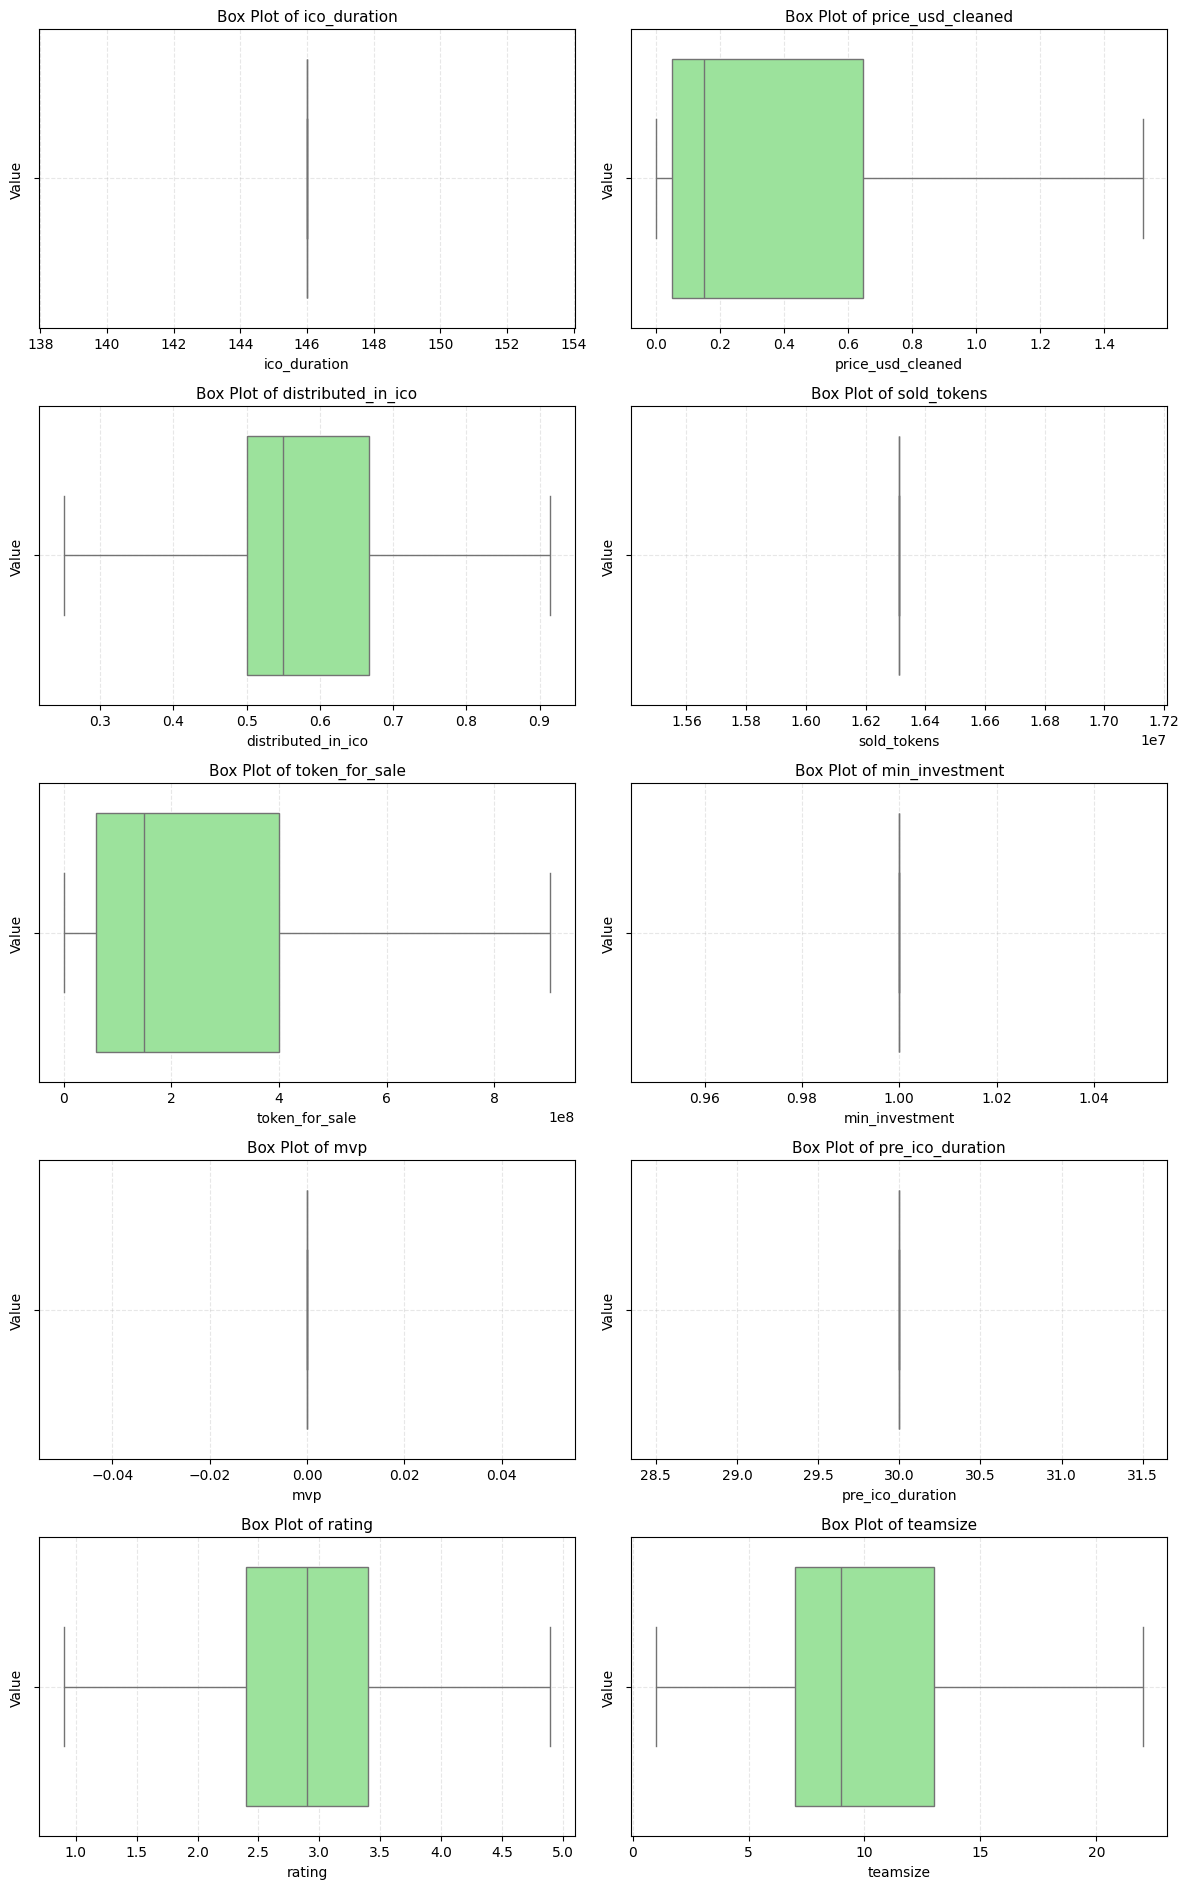

In [95]:
#boxplot of numerical variables
# Set up the subplots with 2 columns and multiple rows
n_cols = 2
n_rows = (len(numerical) + 1) // n_cols  # Calculate number of rows needed

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axs = axs.flatten()  # Flatten the 2D array of axes for easier iteration

for i, col in enumerate(numerical):
    # Create box plot for each numerical column without outliers
    sns.boxplot(x=new_data[col], ax=axs[i], color='lightgreen', showfliers=False)
    axs[i].set_title(f'Box Plot of {col}', fontsize=11)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Value')
    axs[i].grid(True, linestyle='--', alpha=0.3)

# Adjust layout to avoid overlap and ensure visibility of all labels
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()

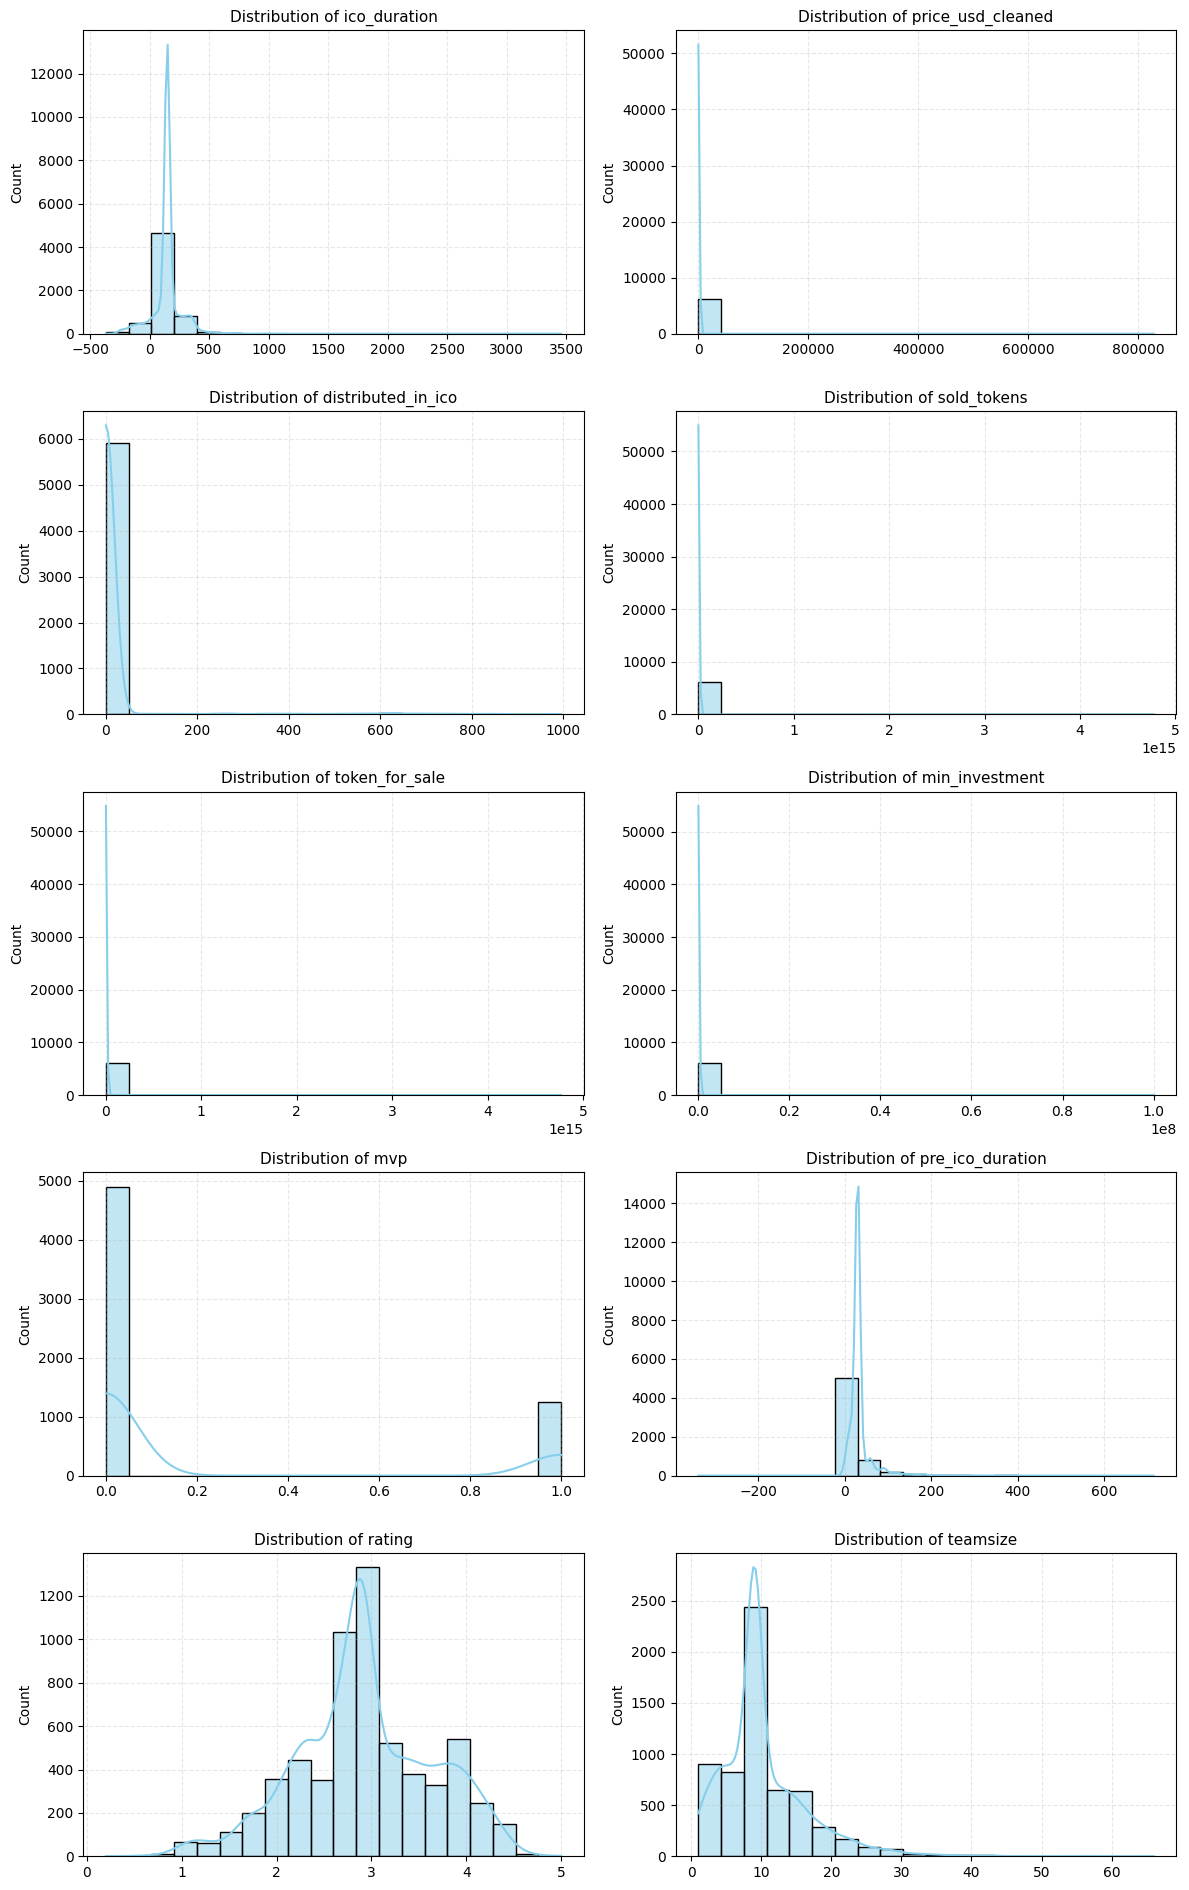

In [96]:
#histogram of numerical variables
# Set up the subplots with 2 columns and multiple rows
n_cols = 2
n_rows = (len(numerical) + 1) // n_cols  # Calculate number of rows needed

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axs = axs.flatten()  # Flatten the 2D array of axes for easier iteration

for i, col in enumerate(numerical):
    # Plot histogram with frequency counts (not density)
    sns.histplot(new_data[col], kde=True, ax=axs[i], color='skyblue', bins=20, stat='count')
    axs[i].set_title(f'Distribution of {col}', fontsize=11)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Count')  # Changed to 'Count' for frequency
    axs[i].grid(True, linestyle='--', alpha=0.3)

# Adjust layout to avoid overlap and ensure visibility of all labels
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()

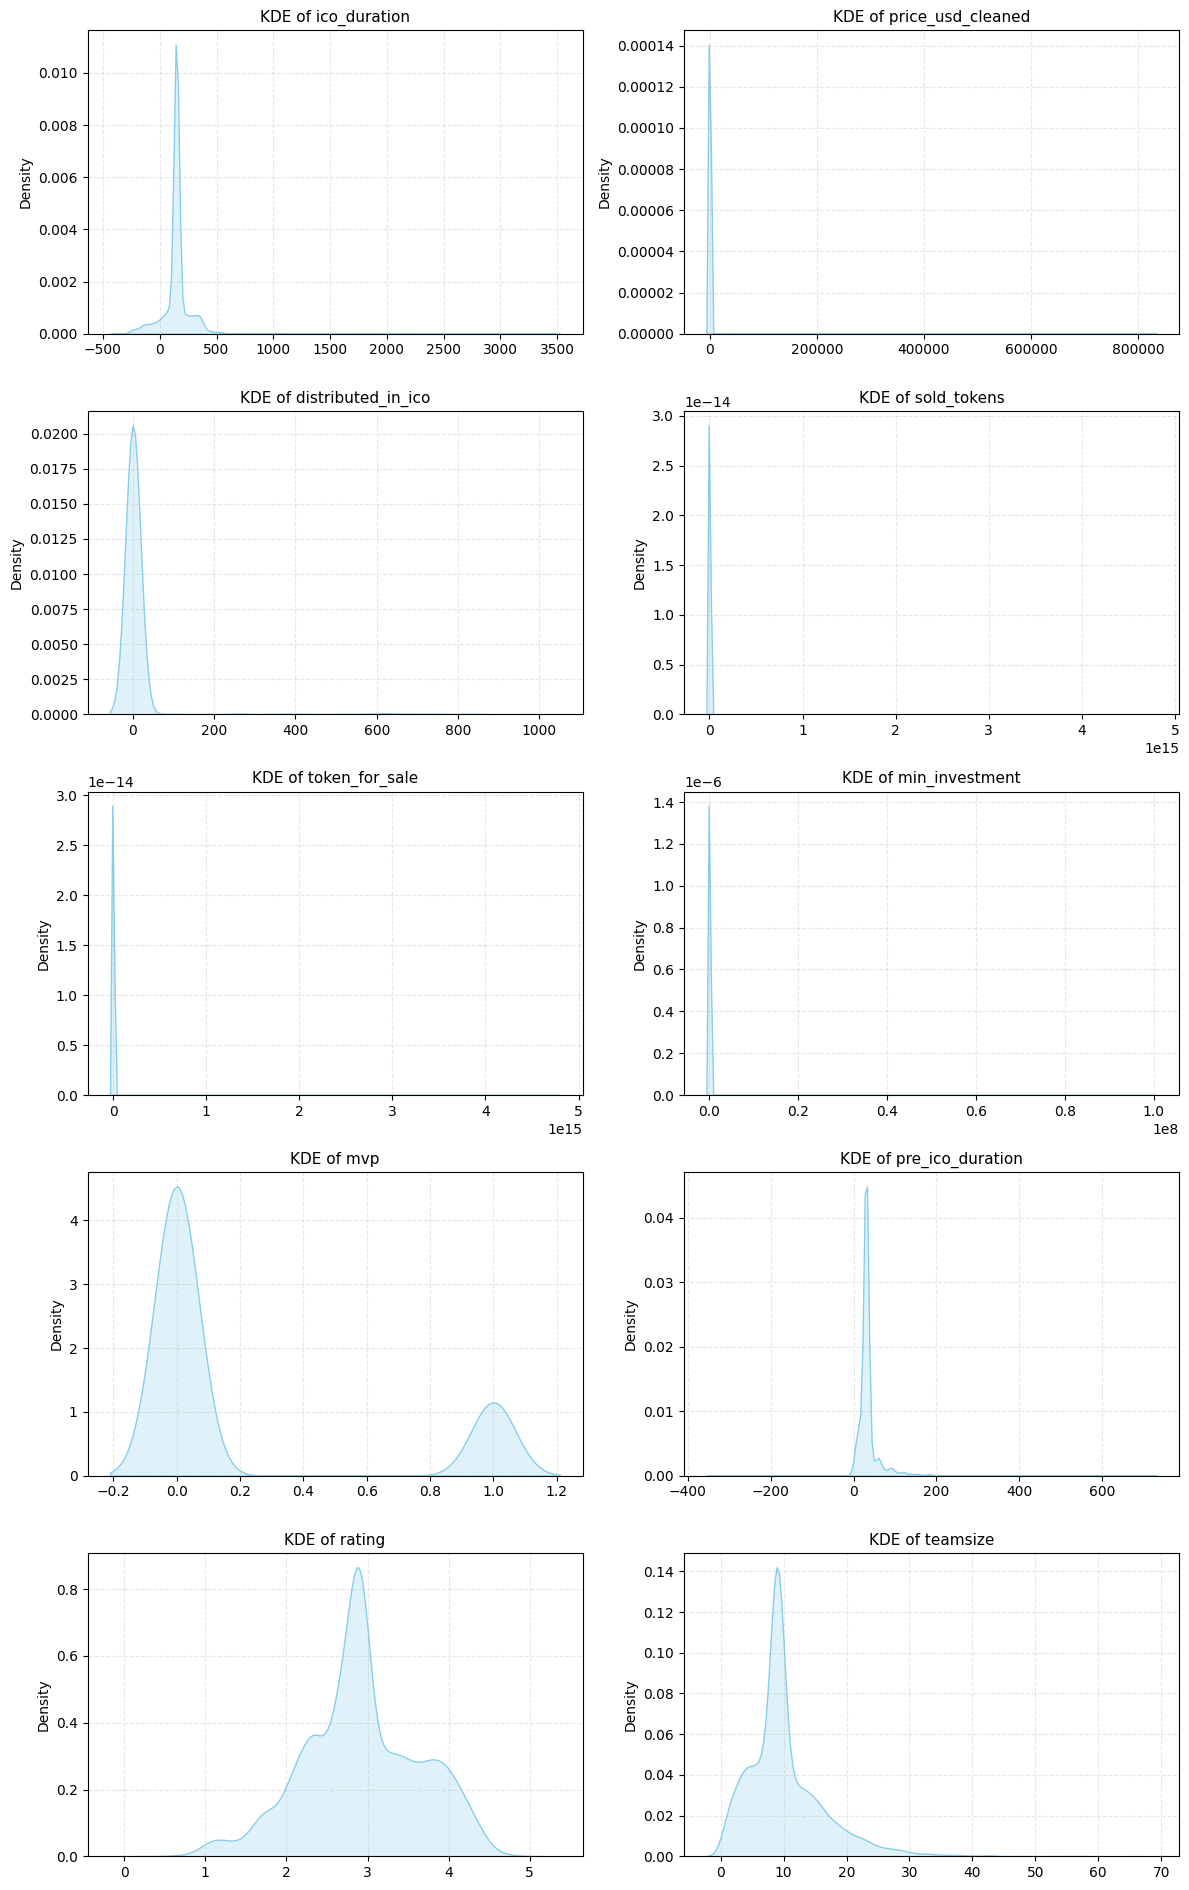

In [97]:
n_cols = 2
n_rows = (len(numerical) + 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(numerical):
    # KDE plot instead of histogram, without explicit smoothing
    if new_data[col].dtype in ['int64', 'float64']: # only KDE numerical columns.
        sns.kdeplot(data=new_data, x=col, fill=True, ax=axs[i], color='skyblue')
        axs[i].set_title(f'KDE of {col}', fontsize=11)
        axs[i].set_xlabel('')
        axs[i].set_ylabel('Density')
        axs[i].grid(True, linestyle='--', alpha=0.3)
    else:
        # if the column is not numeric, plot a countplot. like a histogram for categorical data.
        sns.countplot(data=new_data, x=col, ax=axs[i], color='skyblue')
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
        axs[i].set_title(f'Distribution of {col}', fontsize=11)
        axs[i].set_xlabel('')
        axs[i].set_ylabel('Count')
        axs[i].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

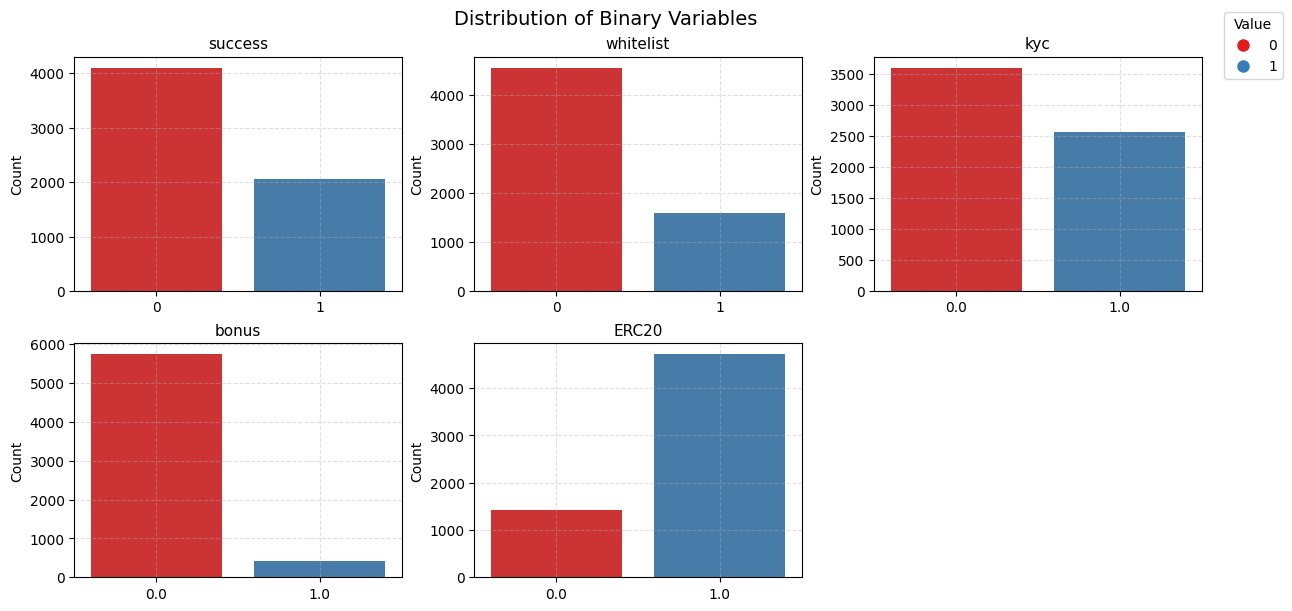

In [98]:
#histogram for the binary variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6), constrained_layout=True)
axs = axs.flatten()


colors = sns.color_palette('Set1', n_colors=2)  # Limit palette to 2 colors for binary

for i, col in enumerate(binary):
    # Use 'hue' to directly map the binary values to colors and suppress legend
    sns.countplot(data=new_data, x=col, ax=axs[i], palette=colors, hue=col, legend=False)
    axs[i].set_title(f'{col}', fontsize=11)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Count')
    axs[i].grid(True, linestyle='--', alpha=0.4)

# Remove unused subplot (last one)
for j in range(len(binary), len(axs)):
    fig.delaxes(axs[j])

# Create a custom legend using ax.legend() with color labels
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[0], markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], markersize=10)]
labels = ['0', '1']

# Adjust the legend to be vertical
fig.legend(handles=handles, labels=labels, title='Value', loc='upper right', ncol=1, bbox_to_anchor=(1.07, 1))

plt.suptitle("Distribution of Binary Variables", fontsize=14)
plt.show()

C:\Users\shubh\AppData\Local\Temp\ipykernel_29940\959732313.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\shubh\AppData\Local\Temp\ipykernel_29940\959732313.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\shubh\AppData\Local\Temp\ipykernel_29940\959732313.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




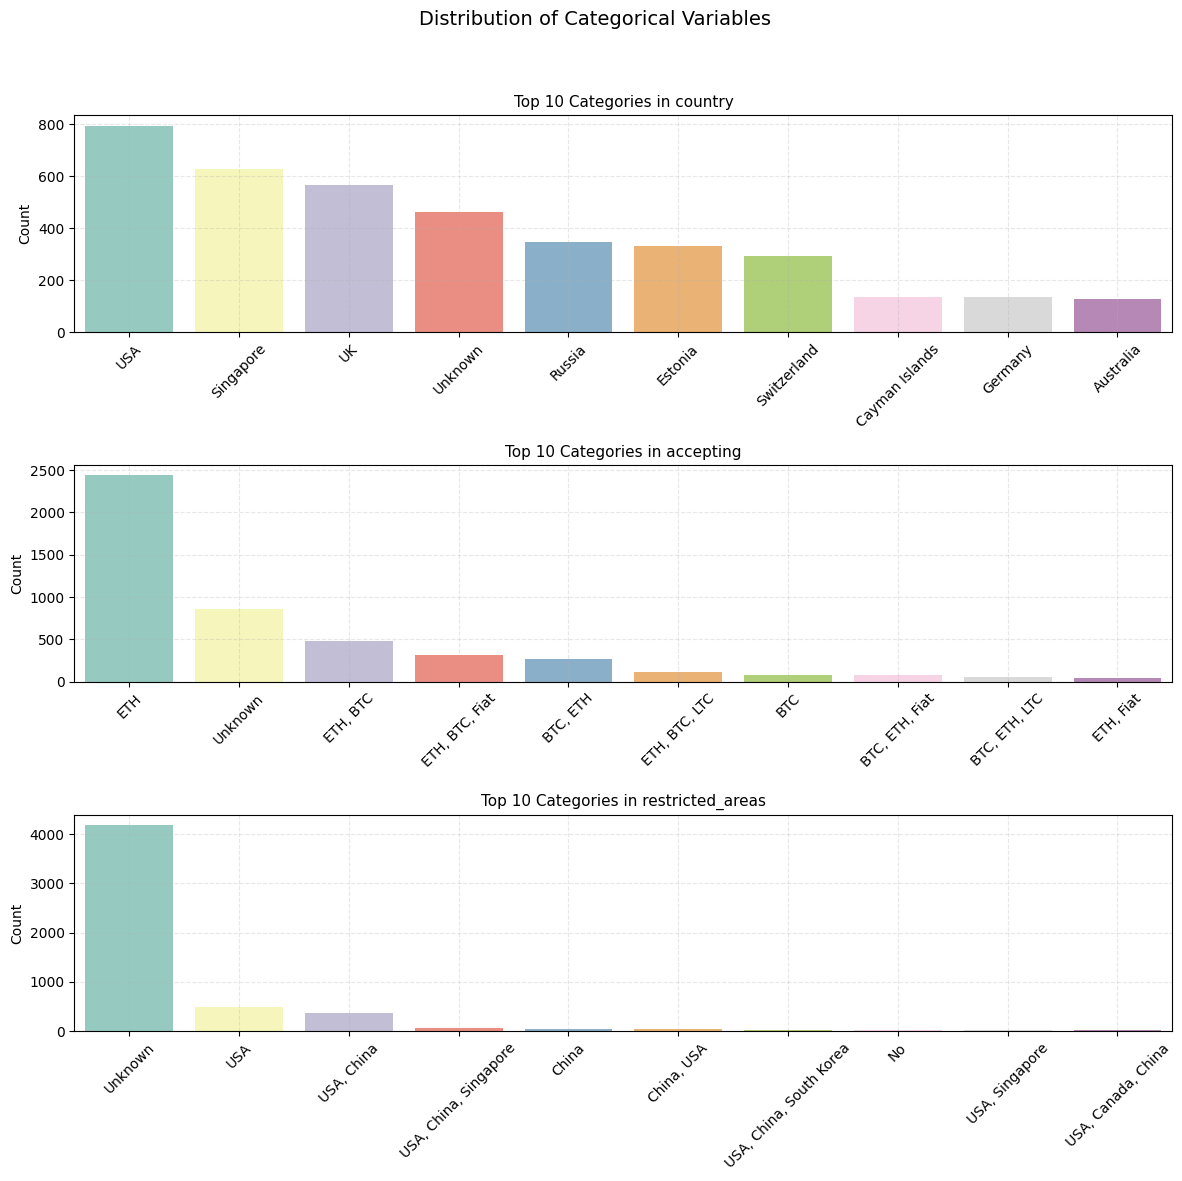

In [99]:
n_cols = 1
n_rows = len(category)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
if n_rows == 1:
    axs = [axs]

for i, col in enumerate(category):
    top_vals = new_data[col].value_counts().nlargest(10)
    sns.barplot(x=top_vals.index, y=top_vals.values, ax=axs[i], palette='Set3')
    axs[i].set_title(f'Top 10 Categories in {col}', fontsize=11)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Count')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(True, linestyle='--', alpha=0.3)

plt.suptitle('Distribution of Categorical Variables', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

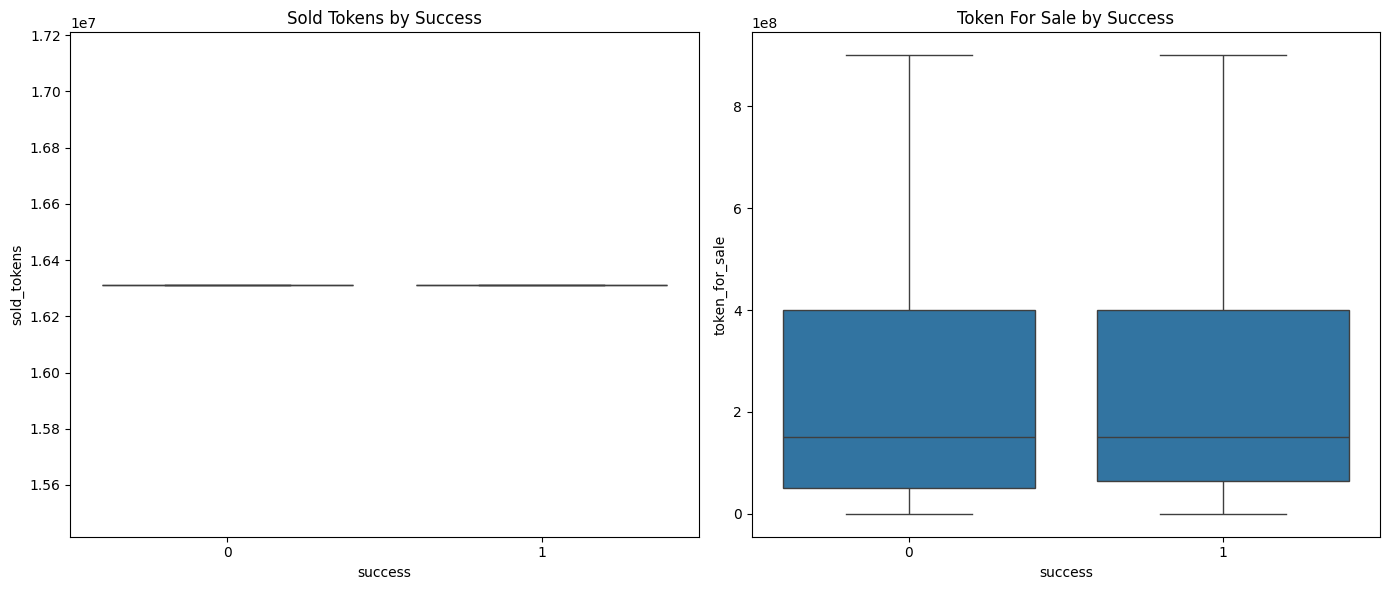

In [100]:
# Boxplots for sold_tokens and token_for_sale grouped by success
plt.figure(figsize=(14, 6))

# Sold Tokens Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='success', y='sold_tokens', data=new_data,showfliers=False)
plt.title('Sold Tokens by Success')

# Token For Sale Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='success', y='token_for_sale', data=new_data, showfliers=False)
plt.title('Token For Sale by Success')

plt.tight_layout()
plt.show()

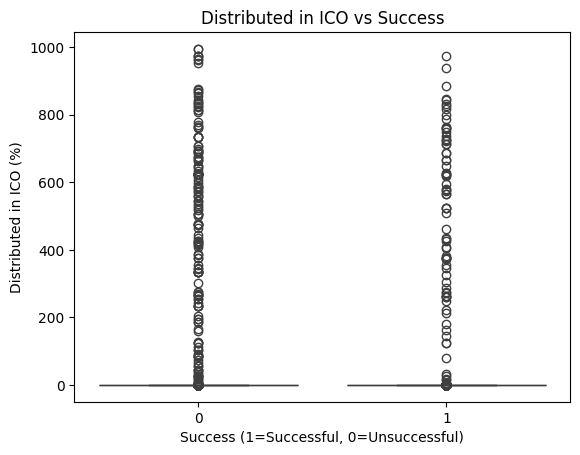

In [101]:
sns.boxplot(x='success', y='distributed_in_ico', data=new_data)
plt.title('Distributed in ICO vs Success')
plt.xlabel('Success (1=Successful, 0=Unsuccessful)')
plt.ylabel('Distributed in ICO (%)')
plt.show()

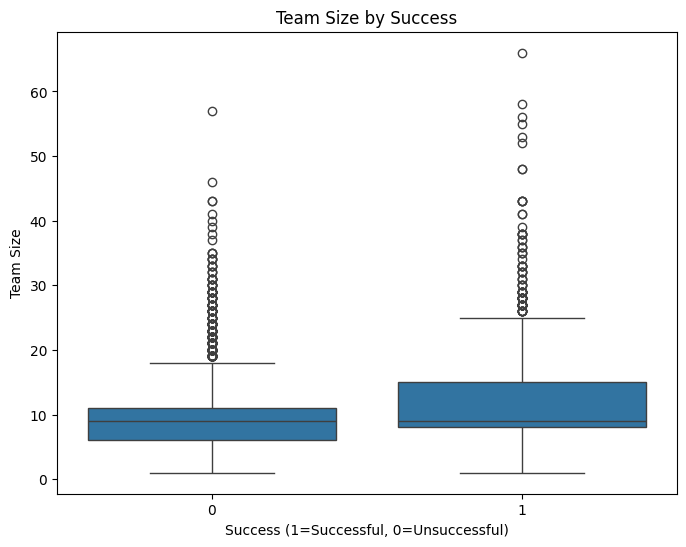

In [102]:
#Boxplot of teamsize grouped by success.
plt.figure(figsize=(8, 6))
sns.boxplot(x='success', y='teamsize', data=new_data)
plt.title('Team Size by Success')
plt.xlabel('Success (1=Successful, 0=Unsuccessful)')
plt.ylabel('Team Size')
plt.show()

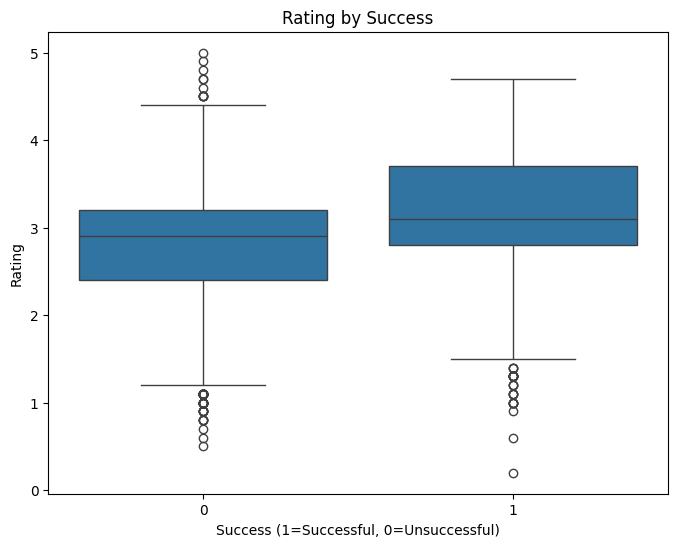

In [103]:
# Boxplot of rating by success.
plt.figure(figsize=(8, 6))
sns.boxplot(x='success', y='rating', data=new_data)
plt.title('Rating by Success')
plt.xlabel('Success (1=Successful, 0=Unsuccessful)')
plt.ylabel('Rating')
plt.show()

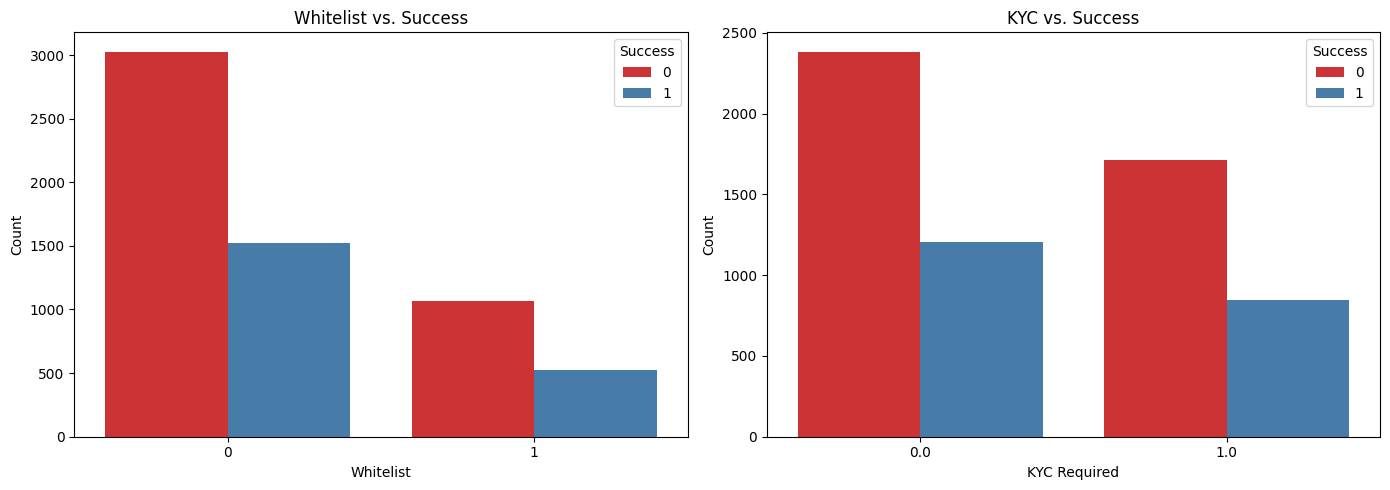

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Plot for Whitelist vs. Success
sns.countplot(data=new_data, x='whitelist', hue='success', palette='Set1', ax=axes[0])
axes[0].set_title('Whitelist vs. Success')
axes[0].set_xlabel('Whitelist')
axes[0].set_ylabel('Count')
axes[0].legend(title='Success', loc='upper right')

# Plot for KYC vs. Success
sns.countplot(data=new_data, x='kyc', hue='success', palette='Set1', ax=axes[1])
axes[1].set_title('KYC vs. Success')
axes[1].set_xlabel('KYC Required')
axes[1].set_ylabel('Count')
axes[1].legend(title='Success', loc='upper right')

plt.tight_layout()
plt.show()

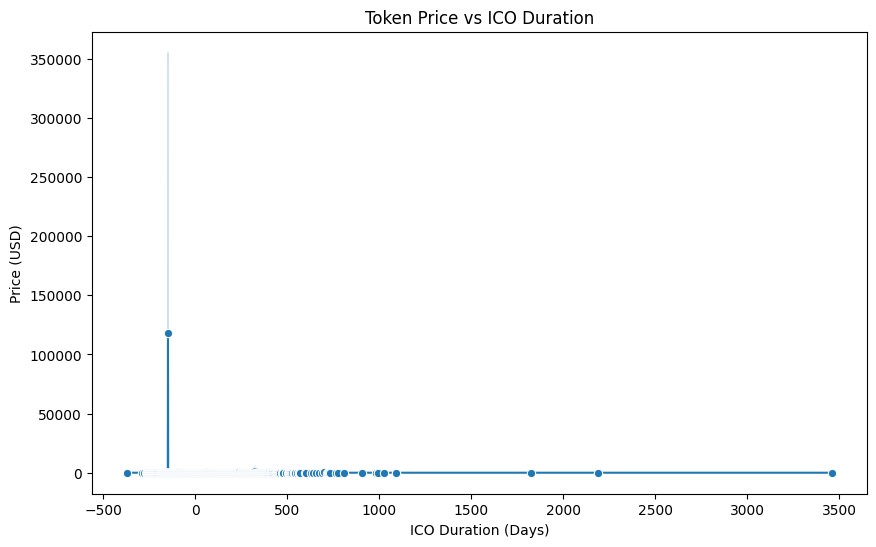

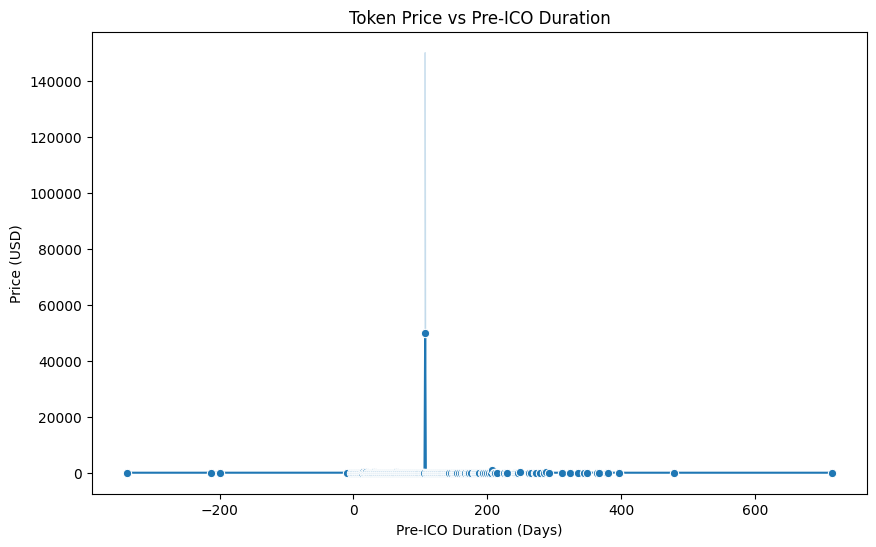

In [105]:
# Plotting Token Price vs ICO Duration
plt.figure(figsize=(10, 6))
sns.lineplot(x='ico_duration', y='price_usd_cleaned', data=new_data, marker='o')
plt.title('Token Price vs ICO Duration')
plt.xlabel('ICO Duration (Days)')
plt.ylabel('Price (USD)')
plt.show()

# Plotting Token Price vs Pre-ICO Duration
plt.figure(figsize=(10, 6))
sns.lineplot(x='pre_ico_duration', y='price_usd_cleaned', data=new_data, marker='o')
plt.title('Token Price vs Pre-ICO Duration')
plt.xlabel('Pre-ICO Duration (Days)')
plt.ylabel('Price (USD)')
plt.show()

In [106]:
import plotly.express as px
import pandas as pd
import pycountry

# Assuming 'new_data' DataFrame is already loaded

def get_country_code(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

# Apply the function to create a new column with ISO 3166-3 codes
new_data['country_code'] = new_data['country'].apply(get_country_code)

# Group success data by country code and success count
success_by_country = new_data.groupby(['country_code', 'success']).size().unstack(fill_value=0)
success_by_country['success_count'] = success_by_country[1]  # Assuming 1 represents success

# Reset the index for country code and success_count
success_by_country = success_by_country[['success_count']].reset_index()

# Sort by success_count to make sure the highest values are dark
success_by_country = success_by_country.sort_values(by='success_count', ascending=False)

# Create the choropleth map using country codes
fig = px.choropleth(success_by_country,
                    locations='country_code',
                    locationmode='ISO-3',  
                    color='success_count',
                    hover_name='country_code',
                    color_continuous_scale="Greens",
                    labels={'success_count': 'Successful ICOs'},
                    title='Successful ICOs by Country')

# Show the map
fig.show()

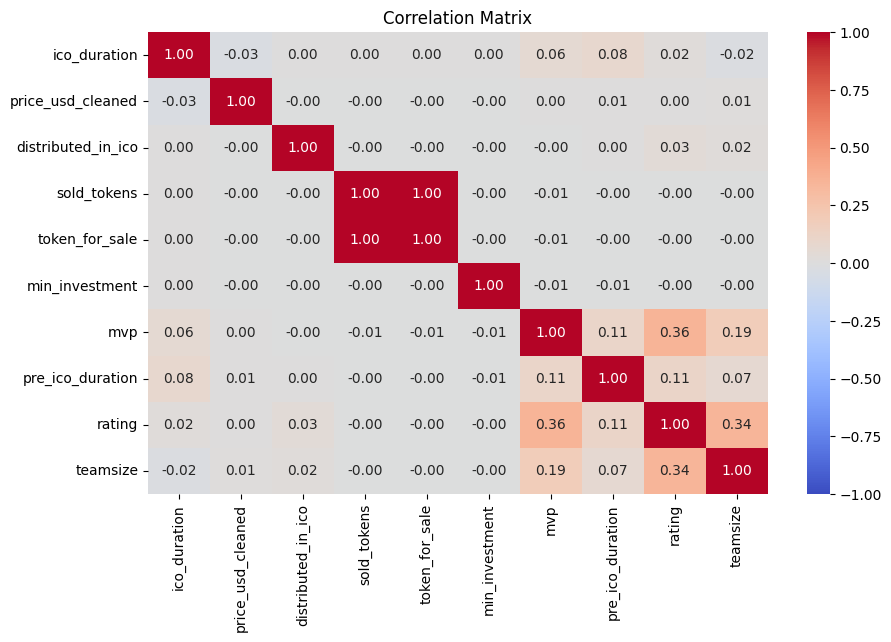

In [107]:
# Calculate correlation matrix
corr_matrix = new_data[numerical].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

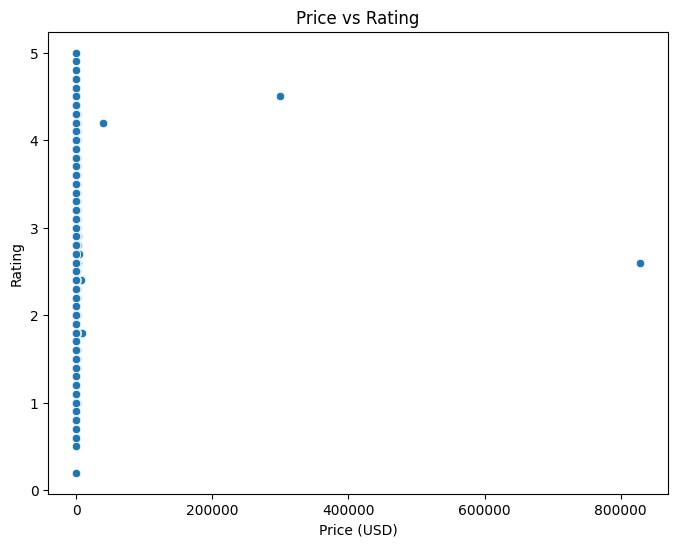

In [108]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price_usd_cleaned', y='rating', data=new_data)
plt.title('Price vs Rating')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.show()

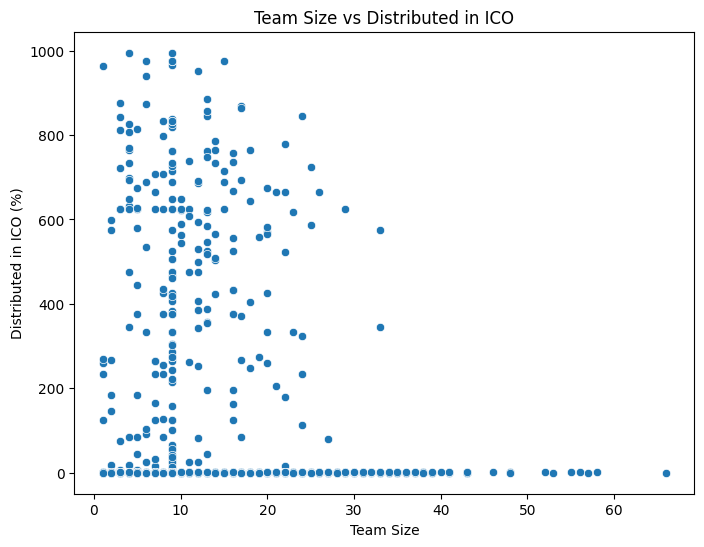

In [109]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='teamsize', y='distributed_in_ico', data=new_data)
plt.title('Team Size vs Distributed in ICO')
plt.xlabel('Team Size')
plt.ylabel('Distributed in ICO (%)')
plt.show()

# Feature Scaling

In [110]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
scaled_values = scaler.fit_transform(new_data[numerical])

# Create a copy of the original DataFrame and update the numerical columns
new_data_scaled = new_data.copy()
new_data_scaled[numerical] = scaled_values

In [111]:
new_data_scaled.head()

country  ico_duration  price_usd_cleaned  success  distributed_in_ico  \
0       India     -0.476506          -0.018095        1           -0.175584   
1      Cyprus      1.647871          -0.018087        0           -0.174646   
2          UK      4.516554          -0.018083        1           -0.175584   
3          UK      0.004193          -0.018087        0           -0.175584   
4  Seychelles      0.004193          -0.018090        0           -0.176522   

   sold_tokens  token_for_sale  whitelist  kyc  bonus  \
0    -0.012759       -0.014267          1  1.0    1.0   
1    -0.012761       -0.014274          0  1.0    0.0   
2    -0.012761       -0.014274          0  0.0    1.0   
3    -0.012761       -0.014267          1  1.0    1.0   
4    -0.012761       -0.014268          1  1.0    1.0   

                                    restricted_areas  min_investment  \
0            Pakistan, Turkey, Somalia, Sirya, Sudan       -0.013716   
1                                                USA       -0.013755   
2  Cuba, Iran, Lebanon, Syria, Libya, Sudan, Soma...       -0.013677   
3  Cuba, Iran, Lebanon, Syria, Libya, Sudan, Soma...       -0.013756   
4        USA, CANADA, CHINA, SOUTH KOREA, SEYCHELLES       -0.013755   

        mvp  pre_ico_duration  \
0  1.985466         -0.159846   
1  1.985466          2.013658   
2  1.985466         -0.129233   
3  1.985466         -0.159846   
4  1.985466         -0.159846   

                                           accepting    rating  teamsize  \
0                        BTC, ETH, and Fiat currency  1.504574 -0.202428   
1                                           ETH, BTC  2.620981  0.600668   
2                                      ETH, BTC, LTC  2.202328  0.600668   
3  BTC, ETH, XRP, BNB, LTC, XLM, USDT, BCH, TRX, EOS  2.481430  5.258620   
4                                                ETH  2.062777  0.921906   

   ERC20 country_code  
0    1.0          IND  
1    1.0          CYP  
2    1.0         None  
3    1.0         None  
4    1.0          SYC

In [112]:
new_data_scaled = new_data_scaled.drop(columns=url_cols, errors='ignore')

In [113]:
cat_cols = new_data_scaled.select_dtypes(include=['object', 'category']).columns.tolist()

# Encode Categorical Columns
new_data_encoded = pd.get_dummies(new_data_scaled, columns=cat_cols)

# KNN

In [114]:
# Separate features (X) and target (y)
X = new_data_encoded.drop('success', axis=1)
y = new_data_encoded['success']

In [115]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
#Find the Best K Value using Cross-Validation
cv_scores = []
neighbors = list(range(1, 21))  # Try K values from 1 to 20

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    cv_scores.append(scores.mean())

best_k = neighbors[cv_scores.index(max(cv_scores))]
print(f"Best K value: {best_k}")

# 6. Train and Evaluate KNN with the Best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

print("\nConfusion Matrix (Best K):")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (Best K):")
print(classification_report(y_test, y_pred_best))

Best K value: 20

Confusion Matrix (Best K):
[[745  74]
 [295 115]]

Classification Report (Best K):
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       819
           1       0.61      0.28      0.38       410

    accuracy                           0.70      1229
   macro avg       0.66      0.60      0.59      1229
weighted avg       0.68      0.70      0.66      1229



In [117]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=20)  # You can adjust the number of neighbors

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[745  74]
 [295 115]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       819
           1       0.61      0.28      0.38       410

    accuracy                           0.70      1229
   macro avg       0.66      0.60      0.59      1229
weighted avg       0.68      0.70      0.66      1229



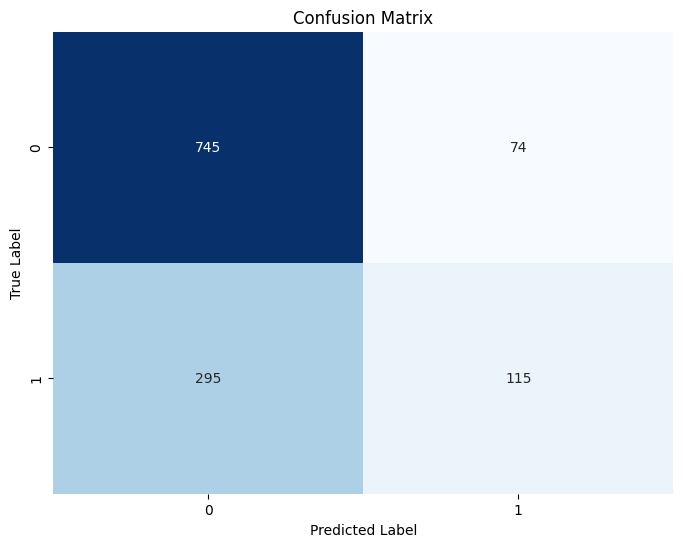

In [118]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [119]:
def plot_confusion(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc(y_test, y_prob, title):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve: {title}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"AUC Score: {roc_auc:.2f}")

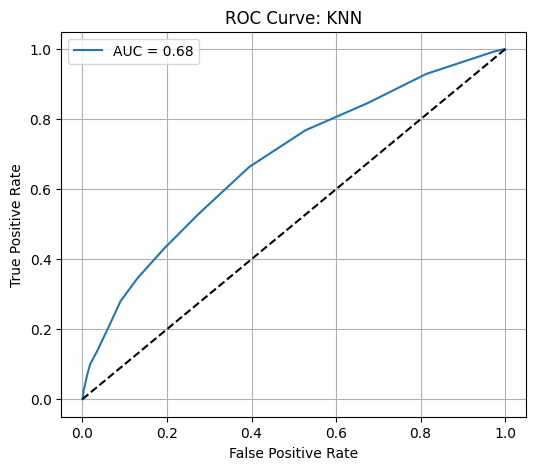

AUC Score: 0.68


In [120]:
# Get predicted probabilities for the positive class (class 1)
y_prob = knn.predict_proba(X_test)[:, 1]

# the ROC plotting function
plot_roc(y_test, y_prob, title="KNN")

# Naive Bayes

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.08      0.14       819
           1       0.34      0.94      0.50       410

    accuracy                           0.36      1229
   macro avg       0.53      0.51      0.32      1229
weighted avg       0.59      0.36      0.26      1229



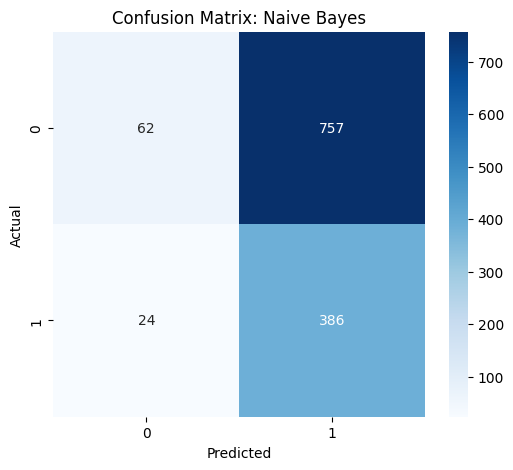

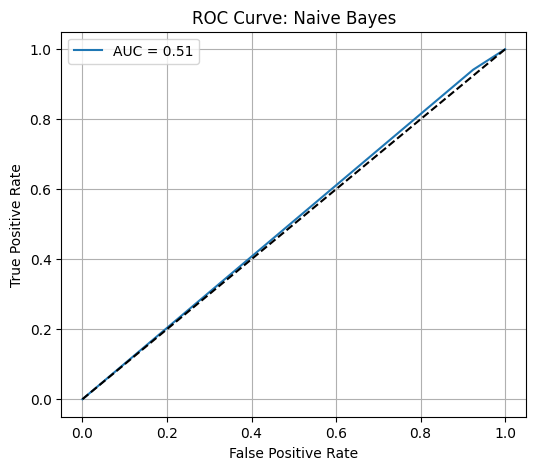

AUC Score: 0.51
Naive Bayes CV Accuracy: 0.3662995982621055


In [121]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)[:, 1]

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
plot_confusion(y_test, y_pred_nb, "Naive Bayes")
plot_roc(y_test, y_prob_nb, "Naive Bayes")

cv_nb = cross_val_score(nb, X_train, y_train, cv=5, scoring='accuracy')
print("Naive Bayes CV Accuracy:", cv_nb.mean())

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81       819
           1       0.69      0.26      0.38       410

    accuracy                           0.71      1229
   macro avg       0.70      0.60      0.60      1229
weighted avg       0.71      0.71      0.67      1229



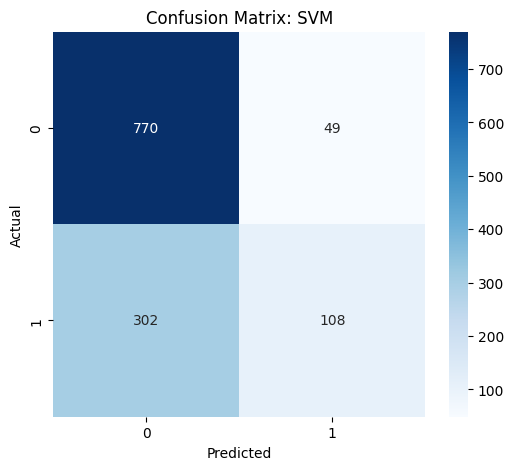

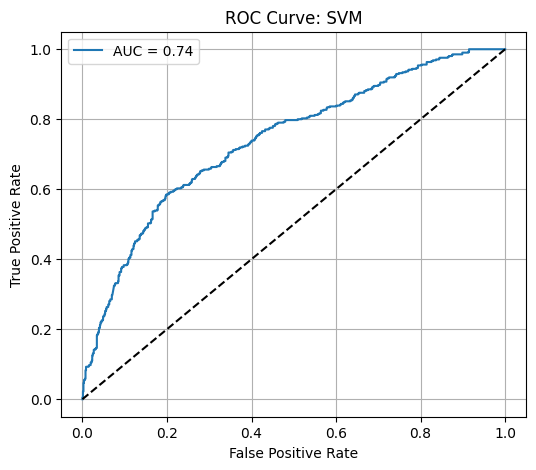

AUC Score: 0.74
SVM CV Accuracy: 0.7077743223392374


In [122]:
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(SVC(probability=True), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

svm_best = svm_grid.best_estimator_
y_pred_svm = svm_best.predict(X_test)
y_prob_svm = svm_best.predict_proba(X_test)[:, 1]

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
plot_confusion(y_test, y_pred_svm, "SVM")
plot_roc(y_test, y_prob_svm, "SVM")

cv_svm = cross_val_score(svm_best, X_train, y_train, cv=5, scoring='accuracy')
print("SVM CV Accuracy:", cv_svm.mean())


In [129]:
print(svm_grid.best_estimator_)

SVC(C=1, probability=True)


In [131]:
print(svm_grid.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


# Random forest

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.82       819
           1       0.70      0.29      0.41       410

    accuracy                           0.72      1229
   macro avg       0.71      0.61      0.61      1229
weighted avg       0.72      0.72      0.68      1229



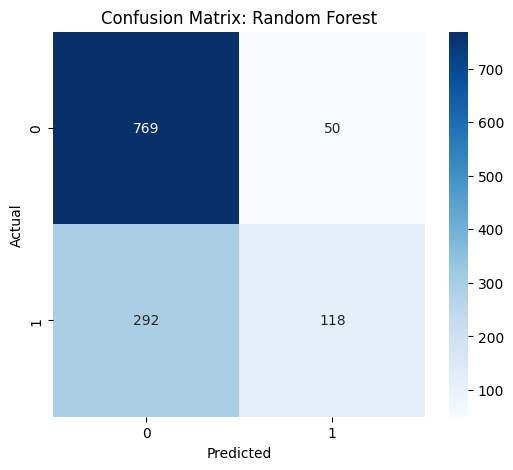

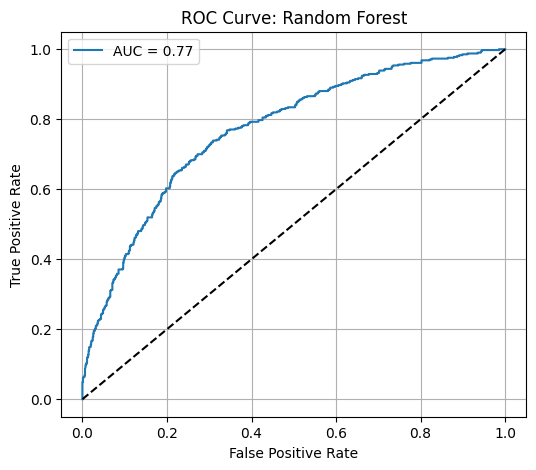

AUC Score: 0.77
Random Forest CV Accuracy: 0.7079765380097087


In [123]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)
y_prob_rf = rf_best.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
plot_confusion(y_test, y_pred_rf, "Random Forest")
plot_roc(y_test, y_prob_rf, "Random Forest")

cv_rf = cross_val_score(rf_best, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest CV Accuracy:", cv_rf.mean())

In [132]:
print(rf_grid.best_estimator_)

RandomForestClassifier(min_samples_split=5, n_estimators=200)


In [133]:
print(rf_grid.best_params_)

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


# Specificty and sensitivity

In [124]:
def compute_sensitivity_specificity(y_test, y_pred, model_name=""):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    sensitivity = tp / (tp + fn)  # Recall / TPR
    specificity = tn / (tn + fp)  # TNR
    
    print(f"{model_name} Sensitivity (Recall): {sensitivity:.2f}")
    print(f"{model_name} Specificity: {specificity:.2f}")
    print("-" * 40)

In [125]:
y_pred_knn = knn.predict(X_test)
compute_sensitivity_specificity(y_test, y_pred_knn, model_name="KNN")


KNN Sensitivity (Recall): 0.28
KNN Specificity: 0.91
----------------------------------------


In [126]:
y_pred_svm = svm_best.predict(X_test)
compute_sensitivity_specificity(y_test, y_pred_svm, model_name="SVM")

SVM Sensitivity (Recall): 0.26
SVM Specificity: 0.94
----------------------------------------


In [127]:
y_pred_rf = rf_best.predict(X_test)
compute_sensitivity_specificity(y_test, y_pred_rf, model_name="Random Forest")

Random Forest Sensitivity (Recall): 0.29
Random Forest Specificity: 0.94
----------------------------------------


In [128]:
y_pred_nb = nb.predict(X_test)
compute_sensitivity_specificity(y_test, y_pred_nb, model_name="Naive Bayes")

Naive Bayes Sensitivity (Recall): 0.94
Naive Bayes Specificity: 0.08
----------------------------------------
